In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy.stats import iqr
from scipy.stats import bootstrap
import scipy.stats as ss
from scipy.stats import binom
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
import random
import scipy.integrate as integrate
from sklearn.model_selection import cross_val_score, train_test_split

In [6]:
df = pd.read_csv("cleaned_data.csv")
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


# Regression and prediction

Understanding the relationship between variables (X1, X2, ..., Xn) and output (Y), as well as predicting the latter according to the former, lies at the core of data science. Here, we will explore the different aspects and concepts of regression:
* Simple linear regression
* Multiple linear regression
* Prediction using regression
* Factor variables in regression 
* Interpreting the regression equation
* Regression diagnostic
* Polynomial and spline regression




### Simple linear regression


Simple linear regression (SLR) is a statistical method that models the relationship between two quantitative variables. The relationship is assumed to be proportional, with the coefficient of proportionality referred to as the slope, or regression coefficient. SLR is used either to understand a relationship or to predict the value of one variable based on the values of another. We often differentiate the two variables by their role:
* The variable we are trying to predict   
    * response, dependent variable, Y variable, target, outcome
* The variable used to predict the response 
    * X variable, feature, attribute, predictor, independent variable

A mathematical equation links the response with the feature, facilitating easier access:

$Y = b_1*X + b_0$   

with $b_1$ the regression coefficient and $b_0$ the intercept. The latter corresponds to the $Y$ values for $X=0$ equals to zero.

#### Fitted Values and Residuals (Least square regression)
Typically, raw data - $X$ values $[X_1,...,Xn]$ and $Y$ values $[Y1,...,Yn]$ - do not follow a straight line.
Therefore, an error ($e$) is added to the deviation for the linear regression:

$Y_i = b_1*X_i + b_0 + e_i$      (observed Y values)

This error named also residuals corresponds to the difference between the observed values ($Y_i$) and the ones obtained by fitting a linear equation ($\hat{Y_i}$):

$\hat{Y_i} = \hat{b_1}*X_i + \hat{b_0}$     (approximation of the $Y$ values noted $\hat{Y}$)

Therefore the $\hat{Y_i}$ are values along the straight lines that deviate from the observed values by: 

$e_i = Y_i - \hat{Y_i}$

The fitted coefficients ($\hat{b_1}$ and $\hat{b_1}$) are currently obtained by minimization of the sum of square the residuals:

$\sum_i (Y_i - \hat{Y_i})^2 = \sum_i (Y_i - \hat{b_1}*X_i + \hat{b_0})^2$

The method is known as the least square regression.

#### Applications

* Healthcare
    * Estimating the increase in blood pressure with weight gain.
* Engineering
    * Assessing the relationship between temperature and material stress.
* Business
    * Forecasting sales based on advertising budget.


#### Limitations 
* Linearity
    * The model assumes a linear relationship between the variables, which may not always hold true in real-world situations.
* Outliers
    * Extreme values can disproportionately influence the regression line, potentially leading to misleading results.

#### Example

In this example, I will study the relationship between the number of cancer cases per 100,000 inhabitants in French regions and the percentage of people aged 60 years or older. Here the following steps:
1. Define the dependent y and independent X variable 
2. Fit the regression model to X and y variables
3. Use the model to predict new y values from the X variable
4. Plot the observed data X,y along with the regression line


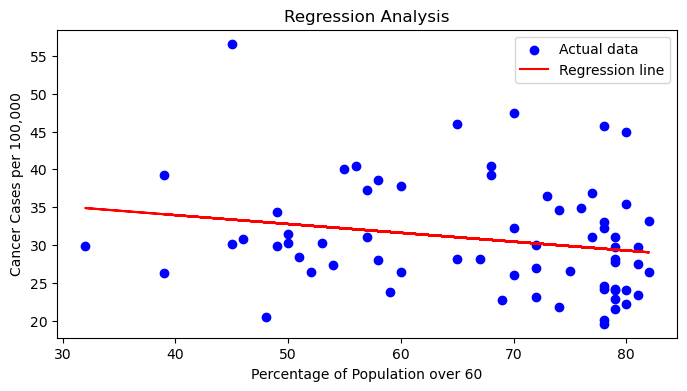

In [37]:

#1 Define the dependent y and independent X variable 
X_slr = df.loc[(df["stroke"]==1)&(df["gender"]=="Female")&(df["work_type"]=="Private")]["age"].values.reshape(-1, 1)  
y = df.loc[(df["stroke"]==1)&(df["gender"]=="Female")&(df["work_type"]=="Private")]["bmi"].values       


#2 Initialize and fit the linear regression model
reg_slr = LinearRegression().fit(X_slr, y)

#3 Generate predictions for the fitted model
y_slr = reg_slr.predict(X_slr)

#4 Plotting
plt.figure(figsize=(8, 4))
plt.scatter(X_slr, y, color='blue', label='Actual data')  # Plot the actual data points
plt.plot(X_slr, y_slr, color='red', label='Regression line')  # Plot the regression line
plt.title('Regression Analysis')
plt.xlabel('Percentage of Population over 60')
plt.ylabel('Cancer Cases per 100,000')
plt.legend()


plt.show()


### Multiple linear regression

Multiple linear regression (MLR) is the extension of the simple linear regression with multiple features (X variables):

$Y = b_0 + b_1*X_1 + b_2*X_2 + ... + b_n*X_n + e$ 

with $Y$ the dependent variable, $b_0$ the intercept, and $b_1, b_2,..., b_n$ the coefficients of the independent variables ($X_1,X_2,...,X_n$), and $e$ the error term. 
As for a simple linear equation (SLR), we can fit raw data ($Y, X_{1,i},X_{2,i},..., X_{n,i}$):

$\hat{Y_i} = \hat{b_0} + \hat{b_1}*X_{1,i} + \hat{b_2}*X_{2,i} + ... + \hat{b_n}*X_{n,i}$ 

and by minimising the sum of the square residual:

$\sum_i (Y_i - \hat{Y_i})^2$

obtained the coefficient $\hat{b_i}$.

As the model can consider multiple influencing factors simultaneously, it often results in higher accuracy and better predictive performance than SLR. However, after fitting a multiple regression model, it's important to evaluate its adequacy and assumptions.

Here the main metrics and methods:
* Root mean square error (RMSE) : $\sum_i^{n} \sqrt{\frac{e_i^2}{n}}$
    * It gives the overall accuracy of the model.
* R-squared statistic : $1 - \frac{\sum_i(Y_i - \hat{Y_i})^2}{\sum_i(Y_i - \bar{Y})^2}$
    * It gives the proportion of variance in the dependent variable that is explained that the independent variable.
* Standard error of a coefficient $b_1$ : SE($b_1$)
    * The standard error of a coefficient, such as $b_1$, indicates the precision with which this coefficient has been estimated in describing the relationship between the dependent variable $Y$ and its independent variable $X_1$.
* t-statistic of a coefficient : $t(b_1) = \frac{b_1}{SE(b_1)}$
    * Compared to the t-distribution it gives if a coefficient is statistically significant.
* cross-validation : statistical technique to evaluate model's performance 
    * It assesses the generalizability of a predictive model by dividing the data into k folds. In this process, the model is trained k times, each time using k−1 folds as the training set and the remaining fold as the validation set where a metric is computed (e.g. RMSE). This technique ensures that each subset of the data is used for both training and testing. This especiallu helps identifying models that are overfitting the training data but perform poorly on unseen data. 
* Stepwise regression : approach to find a balance between model complexity and generalizability
    * Adding variables to a model can improve its accuracy but also leads to overfitting. It addes or removes variable from the model in a step-by-step fashion, guided by statistical metrics such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or adjusted $R^2$.
* Penalized regression : a family of techniques used to prevent overfitting
    *  It adds a penalty term to the function that the model minimizes during the training process (RSS). The penalty forces simpler models by reducing the coefficients of less important variables toward zero.
* Bootstrap for confidence interval
    * For regression coefficient:
    
    From the original dataset, a linear equation is fitted : $\hat{Y_i} = \hat{b_1}*X_i + \hat{b_0}$.
    We want to construct an interval of confidence around the $\hat{b_1}$ coefficent.
    For that, R bootstrap datasets of the same size as the original dataset are generated by sampling with replacement. A linear model is fitted to each of these datasets and the coefficient of interest is recorded. Finally, the 2.5th and 97.5th percentiles of these coefficient are taken to construct a confidence interval around $\hat{b_1}$, providing a statistical range that reflects the uncertainty of the model estimates.

    * For fitted values:

   From the original dataset, a linear model is used to predict a value $\hat{Y_1}$. To estimate the confidence interval around this prediction, R bootstrap datasets are created by sampling with replacement. For each bootstrap dataset, a linear model is fitted, and a new prediction, $\hat{Y_1}$(BS), is made. Additionally, to incorporate the residual error seen in the original model, a random residual from the original fit is added to each bootstrap values. This procedure results in R bootstrap values $\hat{Y_1}$(BS) that approximate the distribution around the original prediction $\hat{Y_1}$. The 2.5th and 97.5th percentiles of these bootstrap values are then used to construct a confidence interval, providing a statistical range that reflects the uncertainty inherent in the model’s estimates.


#### Applications

* Research
    * Model the impact of various environmental factors on climate patterns.
* Healthcare
    * Predict the incidence of diseases by incorporating multiple risk factors, such as age, gender, habits..

#### Limitations 


* Corrolated variables
    * When predictor variables are highly correlated with each other, it can distort the estimation of coefficient values and make them unreliable. 
* Overfitting
    * Including too many variables in a model, especially variables that are not relevant to the prediction, can lead to overfitting. 
* Confounding variable
    * A variable when missing distords the correlation between an independent and the dependent variable.
* Outliers
    * Records or outcomes that significantly deviate from the majority of other data or the predicted results.
#### Example

In this example, I will extend the simple linear model by adding another independent variable which is the percentage of man in the region. Here the following steps:
1. Define the dependent y and independent X variables 
2. Fit the regression model to X and y variables
3. Use the model to predict new y values from the X variable
4. Plot the observed data X,y along with the regression line

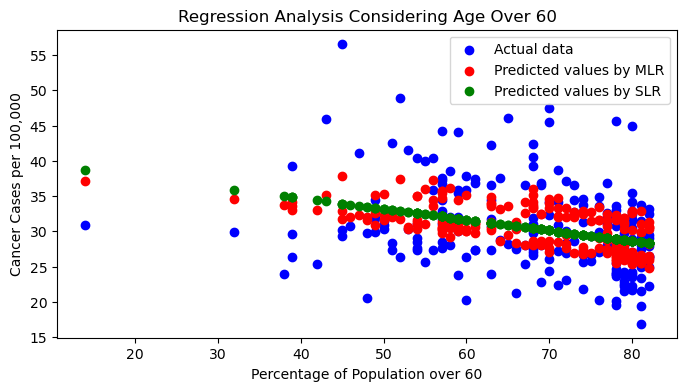

In [20]:

#1. Define the dependent y and independent X variables 
X_mlr = df.loc[df["stroke"]==1][['age', 'avg_glucose_level','hypertension']] 
y = df.loc[df["stroke"]==1]["bmi"]

#2. Initialize and fit the linear regression model
reg_mlr = LinearRegression().fit(X_mlr, y)

#3. Generate predictions for the fitted model
y_mlr = reg_mlr.predict(X_mlr)
# For visualization, choose one variable 
age_60 = X_mlr['age'] 



#4. Plotting
plt.figure(figsize=(8, 4))
plt.scatter(age_60, y, color='blue', label='Actual data')  
plt.scatter(age_60, y_mlr, color='red', label='Predicted values by MLR', alpha=1) 
plt.scatter(age_60, y_slr, color='green', label='Predicted values by SLR', alpha=1) 
plt.title('Regression Analysis Considering Age Over 60')
plt.xlabel('Percentage of Population over 60')
plt.ylabel('Cancer Cases per 100,000')
plt.legend()
plt.show()

#### SLR VS MLR 

Contrary to the SLR model which follows a straight line (1 dimension), the MLR model adds another dimension, and thus can capture more complex relationships. The predictions for MLR seem slighlty improved compared to SLR. However, to compare the two models,  statistical measures such as R-squared, root mean squared error, or other model evaluation metrics are needed. Let's use the different metrics to compare:

In [21]:
r2_model1 = r2_score(y, y_slr)
rmse_model1 = rmse(y, y_slr)

# Calculate metrics for model 2
r2_model2 = r2_score(y, y_mlr)
rmse_model2 = rmse(y, y_mlr)

# Print out the metrics for comparison
print(f"Model SLR - R2: {r2_model1},  RMSE: {rmse_model1}")
print(f"Model MLR - R2: {r2_model2}, RMSE: {rmse_model2}")

Model SLR - R2: 0.08968136490261347,  RMSE: 6.024504587263186
Model MLR - R2: 0.23517565410765584, RMSE: 5.522115356287664


The MLR outperforms the SLR model in both metrics. The MLR model has a higher $R^2$ value, which means it does a better job capturing the variance in the data. It also has lower RMSE, indicating that its predictions are closer to the actual values on average. To validate that the models are generalizable, i.e. performe well on unseen data, let's proceed to a cross-validation using the $R^2$ as the metric:


In [22]:
cv_mlr = cross_val_score(LinearRegression(), X_mlr, y, cv=4, scoring="r2")
cv_slr = cross_val_score(LinearRegression(), X_slr, y, cv=4, scoring="r2")

print(f"Model SLR {cv_slr}")
print(f"Model MLR {cv_mlr}")


Model SLR [ 0.13653229  0.14688986 -0.03394126 -0.03769205]
Model MLR [0.18090947 0.29965224 0.02562542 0.2047134 ]


Model SLR (Single Linear Regression): The R² scores across the 4 folds are fairly high, which suggests the model is predicting the dependent variable quite well using the single predictor. 

Model MLR (Multiple Linear Regression): The scores are more varied here. This suggests that the MLR model may not be as stable across different subsets of the data, which could be a result of overfitting or the additional variables not having a consistent relationship with the dependent variable across the different folds.

We can also perform a cross-validation using the root mean squared error. For doing so, I will normalized the y-value:

Both models give very low RMSE accross the k folds. The MLR model although being more complexe still performs less tha the SLR. Therefore, thge additional complexity of the MLR model do not capture useful information and should be removed.

### Categorical variables

Categorigal variables can be transformed to be used in linear regression model. On common approach is the transformation into binary 0–1 variables, often named binary dummy variables. There is two different methods:

* Reference coding
    * For a categorical variable (e.g. color) of 4 categories (blue, orange, yellow and purple), one of the category is taken as reference for the other.
* One hot encoder 
    * Contrary to reference coding, all levels are considered. It is used for machine learning but not appropriate for linear regression.

#### Example

In this example, I will transform the categories of name_region in a set of binary variables which will be used fit a MLR model: 

Model with dummies : [ 0.0016893   0.06894405 -0.57908767 -0.0106496   0.20100428]


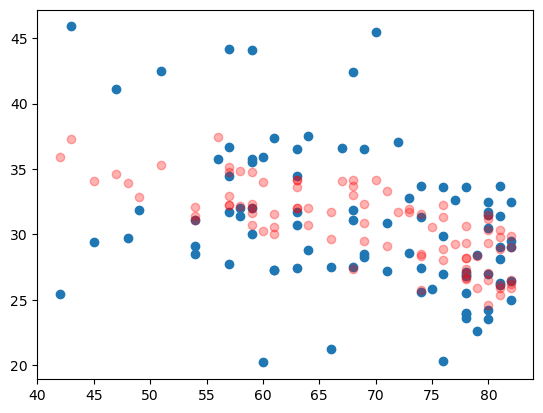

In [33]:
#1. Define the dependent y and independent X variables 
X_dummies = pd.get_dummies(df.loc[(df["stroke"]==1)&(df["gender"]=="Male")][['age', 'avg_glucose_level',
                                                    'hypertension', 'heart_disease', 'smoking_status']] ) # reference coding
y = df.loc[(df["stroke"]==1)&(df["gender"]=="Male")]["bmi"]

#2. Fit the MLR model
reg_dummies = LinearRegression().fit(X_dummies,y)

#3. Use the MLR model to preditc new y values
y_dummies = reg_dummies.predict(X_dummies)

#4. Plot and output
plt.scatter(df.loc[(df["stroke"]==1)&(df["gender"]=="Male")]["age"],y)
plt.scatter(df.loc[(df["stroke"]==1)&(df["gender"]=="Male")]["age"],y_dummies,alpha=0.3,color="red")

cv_dummies= cross_val_score(LinearRegression(),X_dummies,y,cv=5,scoring="r2")
print(f"Model with dummies : {cv_dummies}")